In [60]:
import os
from snn_delays.config import CHECKPOINT_PATH
from snn_delays.utils.model_loader import ModelLoader
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from snn_delays.utils.results_utils import get_results, get_states

ckpt_dir = 'abl1_shd50'
ckpt_dir2 = 'abl1_shd50_rnn_mt'
ckpt_dir3 = 'abl1_shd50_mf_mt'
ckpt_dir4 = 'abl1_shd50_rd_mt'

# delays
sweep_params_names = {
    'connection_type': ['f'],
    'delay': ['d'],
    'structure':['2l'],
    'tau_m':['hm', 'ht'],
    'T_freeze_taus':['ft', 'tt']
    }

# recurrent
sweep_params_names2 = {
    'connection_type': ['r'],
    'delay': ['nd'],
    'structure':['2l'],
    'tau_m':['ht'],
    'T_freeze_taus':['ft', 'tt']
    }

# multi-feedforward
sweep_params_names3 = {
    'connection_type': ['mf'],
    'delay': ['nd'],
    'structure':['2l'],
    'tau_m':['ht'],
    'T_freeze_taus':['ft', 'tt']
    }

sweep_params_names4 = {
    'connection_type': ['f'],
    'delay': ['rd'],
    'structure':['2l'],
    'tau_m':['ht'],
    'T_freeze_taus':['ft', 'tt']
    }


import torch
def convert_to_taus(tau_m_snn, duration_ms, simulation_steps, mode='discrete'):
    
    taus_real = []
    taus_discrete = []

    delta_t = duration_ms/simulation_steps
    for tau_m in tau_m_snn:
        print(tau_m)
        taus_real.append(-delta_t/torch.log(torch.sigmoid(tau_m)).detach().cpu().numpy())
        taus_discrete.append(-1.0/torch.log(torch.sigmoid(tau_m)).detach().cpu().numpy())

    if mode == 'real':
        return taus_real
    elif mode == 'discrete':
        return taus_discrete

def tau_process(tau_m, dd):
    for model in tau_m.keys():
        time_ms = dd[model][0]['time_ms']
        tau_m[model] = [convert_to_taus(tau_m[model][x], time_ms, 50, 'discrete') for x in range(len(tau_m[model]))]
    return tau_m

attributes = ['tau_m_h', 'dataset_dict']

tau_m_init, dd, _, __ = get_states(ckpt_dir4, sweep_params_names4, attributes, rpts=3, batch_size=128, device='cuda:0', mode='initial')
tau_m_init_real = tau_process(tau_m_init, dd)

tau_m_max, dd, _, __ = get_states(ckpt_dir4, sweep_params_names4, attributes, rpts=3, batch_size=128, device='cuda:0', mode='max')
tau_m_max_real = tau_process(tau_m_max, dd)

tau_m_last, dd, _, __ = get_states(ckpt_dir4, sweep_params_names4, attributes, rpts=3, batch_size=128, device='cuda:0', mode='last')
tau_m_last_real = tau_process(tau_m_last, dd)

# acc_r, spk_r, spkt_r, _, _, _, _ = get_results(ckpt_dir2, sweep_params_names2, rpts=10)

# acc_mf, spk_mf, spkt_mf, _, _, _, _ = get_results(ckpt_dir3, sweep_params_names3, rpts=10)

# acc_rd, spk_rd, spkt_rd, _, _, _, _ = get_results(ckpt_dir4, sweep_params_names4, rpts=10)


Parameter containing:
tensor([3.9966, 6.1460, 4.3710, 1.0659, 3.7050, 4.4421, 3.1552, 4.5278, 3.9505,
        4.0823, 3.8995, 3.3172, 1.2617, 4.0129, 4.4846, 3.1414, 2.9644, 5.6663,
        4.1964, 3.2534, 2.5693, 1.8304, 3.8257, 4.5980, 3.1194, 6.2694, 4.0727,
        5.1887, 3.3538, 3.5271, 3.3800, 4.2029, 4.1446, 5.0599, 3.1558, 4.5029,
        7.0383, 4.6518, 6.9142, 3.4840, 5.4346, 4.1965, 3.4731, 4.8984, 3.2369,
        2.9248, 3.8635, 1.5055, 4.9879, 3.5905, 5.0358, 4.9535, 2.6126, 4.5821,
        1.1350, 4.8685, 3.8705, 3.0239, 4.6007, 5.1685, 3.2261, 5.3960, 2.6892,
        3.3828], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([4.8572, 4.5719, 2.3732, 4.4217, 3.7248, 4.7893, 2.8166, 2.2063, 4.2467,
        4.0175, 3.7720, 6.1738, 4.0924, 4.9776, 3.6403, 4.8800, 3.3490, 4.0142,
        3.7029, 3.5884, 4.1412, 4.3816, 5.5618, 3.0611, 4.0881, 4.8797, 4.0344,
        2.8820, 4.0907, 5.2058, 3.4234, 3.7154, 5.0450, 4.5089, 3.1530, 5.1717,
        5.0097, 4.4674

In [67]:
import numpy as np
model = 'f_rd_2l_ht_tt'
rpt = 0

tau_evolution = []

for lyr in range(3):
    tau_evolution.append(np.stack([tau_m_init_real[model][rpt][lyr], tau_m_max_real[model][rpt][lyr]]))



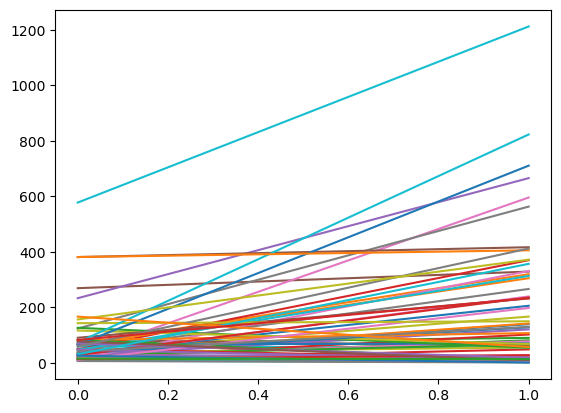

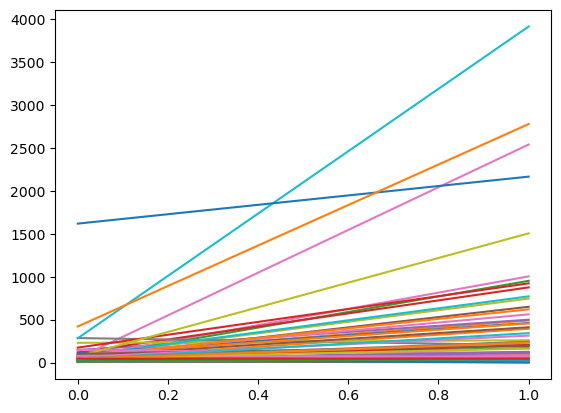

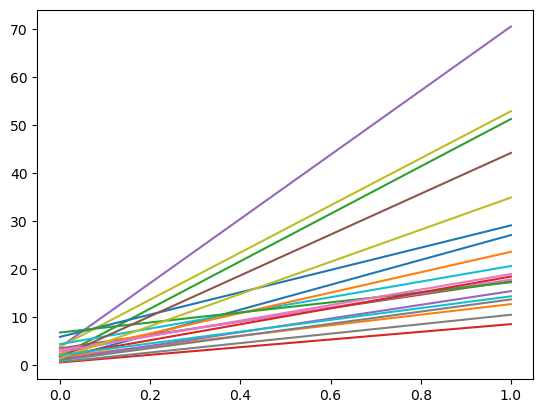

In [68]:
import matplotlib.pyplot as plt
for lyr in range(3):
    plt.plot(tau_evolution[lyr])
    plt.show()

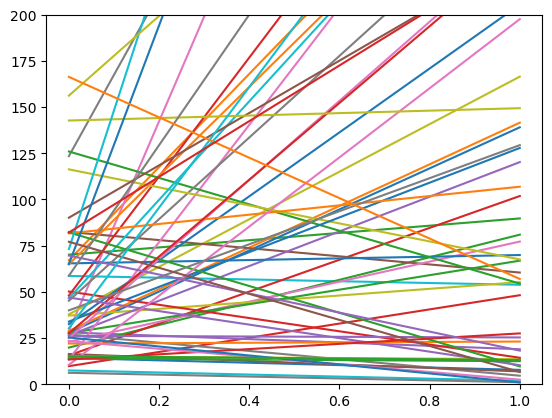

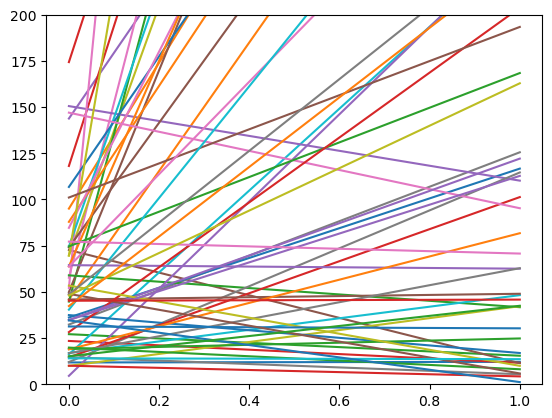

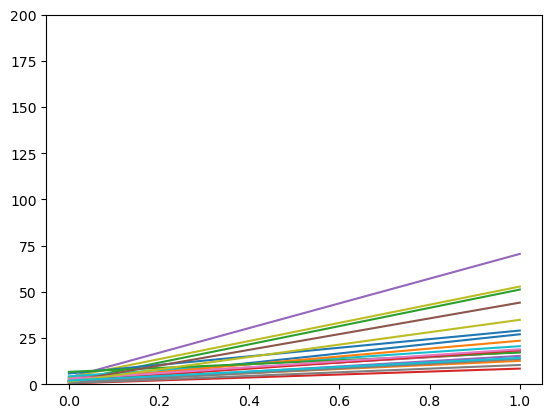

In [63]:
import matplotlib.pyplot as plt
for lyr in range(3):
    plt.plot(tau_evolution[lyr])
    plt.ylim(0,200)
    plt.show()

#### Conclusion: some taus decrease. Even though the general tendency is always for them to go up.